In [59]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import re
from fnmatch import fnmatch
from fnmatch import filter
import pandas as pd
import nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
stopwords = set(nltk.corpus.stopwords.words('english'))


## Implementation of Test Case

### Iniitialize Array and term-documents

In [9]:
#Document Dict, Index and Title
document_dict = {'B1': 'A Course on Integral Equations', 'B2': 'Attractors for Semigroups and Evolution Equations', 'B3': 'Automatic Differentiation of Algorithms: Theory, Implementation, and Application',
'B4': 'Geometrical Aspects of Partial Differential Equations', 'B5' : 'Ideals, Varieties, and Algorithms An Introduction to Computational Algebraic Geometry and Commutative Algebra',
'B6': 'Introduction to Hamiltonian Dynamical Systems and the N-Body Problem', 'B7': 'Knapsack Problems: Algorithms and Computer Implementations', 'B8': 'Methods of Solving Singular Systems of Ordinary Differential Equations',
'B9': 'Nonlinear Systems', 'B10': 'Ordinary Differential Equations', 'B11': 'Oscillation Theory for Neutral Differential Equations with Delay', 'B12': 'Oscillation Theory of Delay Differential Equations',
'B13': 'Pseudodifferential Operators and Nonlinear Partial Differential Equations', 'B14': 'Sinc Methods for Quadrature and Differential Equations', 'B15': 'Stability of Stochastic Differential Equations with Respect to Semi-Martingales',
'B16': 'The Boundary Integral Approach to Static and Dynamic Contact Problems', 'B17': 'The Double Mellin-Barnes Type Integrals and Their Applications to Convolution Theory'}

#Term List 
term_lst = ['algorithms','application','delay','differential','equations','implementation','integral','introduction','methods','nonlinear','ordinary','oscillation','partial','problem','systems','theory']

#List of Titles
doc_title_lst = [i for i in document_dict]


In [10]:
'''Parse Document dict and create list of indiviudal words'''
for i in document_dict:
    lst1 = []
    word = ''
    for j in document_dict[i]:
        if j == ' ':
            lst1.append(word)
            word = ''
        elif j.isalpha():
            word += j.lower()
        else:
            pass
    lst1.append(word)
    document_dict[i] = lst1



In [11]:
'''Create array of zeros with terms as rows and documents as columns. Check for term contained in document and update entries to reflect occurences of term in document'''
term_doc = np.zeros((len(term_lst), len(document_dict)), float)

for n in range(0, len(term_lst)):
    k=0
    for i in document_dict:
        counter = 0
        for m in document_dict[i]:
            if term_lst[n] == m:
                counter += 1
            elif len(re.findall('^'+term_lst[n], m)) > 0:
                counter += 1
        term_doc[n,k] = counter
        k+=1
        


## Compute SVD for Matrix

In [12]:
P = sp.linalg.svd(term_doc)[0][:,0:2]
sigma = sp.linalg.diagsvd(sp.linalg.svd(term_doc)[1][0:2],2,2)
Q = sp.linalg.svd(term_doc)[2][0:2,:].transpose()

## Plot on 2D Plane

### Create X and Y coords for terms and docs

In [82]:
sum(sum(Q))

4.756549390485269

In [13]:
#For Terms
xvals_terms = (P[:,0] * sigma[0,0])/sum(P[:,0])
yvals_terms = (P[:,1] * sigma[1,1])/sum(P[:,1])

xvals_docs = (Q[:,0] * sigma[0,0])/sum(Q[:,0])
yvals_docs = (Q[:,1] * sigma[1,1])/sum(Q[:,1])

### Plot

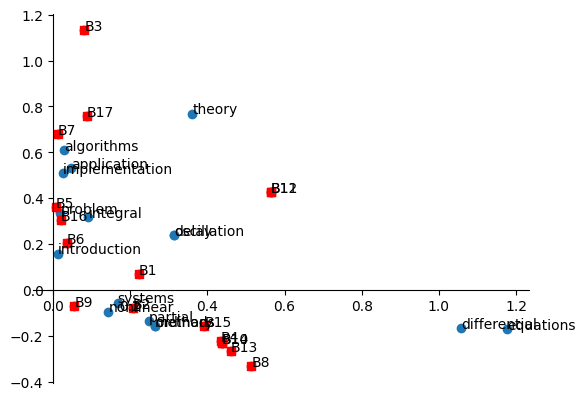

In [14]:
fig, ax = plt.subplots()
ax.scatter(xvals_terms,yvals_terms)
ax.scatter(xvals_docs, yvals_docs, marker = 's', color = 'red')
for i,txt in enumerate(term_lst):
    ax.annotate(txt, (xvals_terms[i], yvals_terms[i]))
ax.scatter(xvals_docs,yvals_docs,color = 'red')
for i,txt in enumerate(doc_title_lst):
    plt.annotate(txt, (xvals_docs[i], yvals_docs[i]))
#ax.scatter(query1_s2[0,1], query1_s2[0,0], color = 'red')
# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

## User Query
"Application and Theory" $\rightarrow$ "Application Theory"


In [15]:
query = 'Application Theory'
query1 = np.zeros((1,16),int)
query1[0,1] = 1
query1[0,-1] = 1
query1

query_coord = np.matmul(np.matmul(query1, P), np.linalg.inv(sigma))

In [76]:
query_coord

array([[0.05112242, 0.3337168 ]])

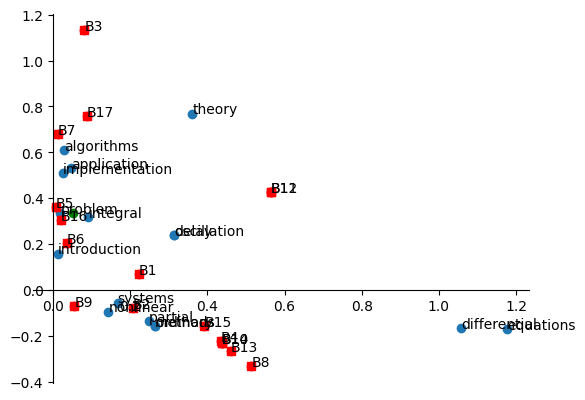

In [16]:
fig, ax = plt.subplots()
ax.scatter(xvals_terms,yvals_terms)
ax.scatter(xvals_docs, yvals_docs, marker = 's', color = 'red')
ax.scatter(query_coord[0,0], query_coord[0,1], color = 'green')
for i,txt in enumerate(term_lst):
    ax.annotate(txt, (xvals_terms[i], yvals_terms[i]))
ax.scatter(xvals_docs,yvals_docs,color = 'red')
for i,txt in enumerate(doc_title_lst):
    plt.annotate(txt, (xvals_docs[i], yvals_docs[i]))
#ax.scatter(query1_s2[0,1], query1_s2[0,0], color = 'red')
# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

In [17]:
doc_coord = np.array(list(zip(xvals_docs,yvals_docs)))

In [105]:
len(doc_coord), len(doc_title_lst)

(17, 17)

In [18]:
doc_coord = np.array(list(zip(xvals_docs,yvals_docs)))
return_lst = []
for i in range(0, len(doc_coord)):
    if np.dot(query_coord, doc_coord[i])/(np.linalg.norm(query_coord)*np.linalg.norm(doc_coord[i])) > .55:
        return_lst.append(doc_title_lst[i])
return_lst

['B3', 'B5', 'B6', 'B7', 'B11', 'B12', 'B16', 'B17']

In [103]:
cos_sim = np.dot(query_coord, doc_coord[2])/(np.linalg.norm(query_coord)*np.linalg.norm(doc_coord[2]))
cos_sim

array([0.99674542])

In [102]:
cos_sim

array([-0.21601969])

In [195]:
fnmatch('method', 'method*')

True

In [109]:
def get_user_query():
    queury = input("Input Query:")
    return queury

In [123]:
get_user_query()

'Show me documents about the theory and applications of ML algorithms'

In [193]:
def parse_user_query(query_string, terms_lst):
    parsed_query = []
    query_lst = query_string.lower().split(' ')
    query_arr = np.zeros((1, len(terms_lst)), int)
    for i in range(0,len(terms_lst)):
        for j in query_lst:
            if fnmatch(j, terms_lst[i] + '*'):
                query_arr[0,i] += 1
    return query_arr



## Scale to Movie Database

In [124]:
movies_full = pd.read_csv('movies_metadata.csv')


C:\Users\steve\AppData\Local\Temp\ipykernel_19640\2223549761.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_full = pd.read_csv('movies_metadata.csv')


In [132]:
movies_full = movies_full[movies_full['original_language'] == 'en'].reset_index(drop=True)
movies_full = movies_full[movies_full['vote_average'] >= 6 ].reset_index(drop=True)

In [133]:
movies_full = movies_full[['title', 'overview']]
movies_full = movies_full.dropna().reset_index(drop=True)
#movies_full.dropna(subset = 'overview').reindex()


In [134]:
movies_full

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Heat,"Obsessive master thief, Neil McCauley leads a ..."
...,...,...
15911,In a Heartbeat,A closeted boy runs the risk of being outed by...
15912,The Devilish Tenant,A man rents an apartment and furnishes it in r...
15913,House of Horrors,An unsuccessful sculptor saves a madman named ...
15914,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ..."


In [135]:
movie_desc= []
for i in movies_full['overview']:
    movie_desc.append(i.lower())
for i in range(0,len(movie_desc)):
    movie_desc[i] = movie_desc[i].split(' ')


In [137]:
for i in range(0, len(movie_desc)):
    temp_lst = []
    for j in movie_desc[i]:
        if j not in stopwords:
            temp_lst.append(j)
    movie_desc[i] = temp_lst        

In [101]:
len(movie_desc[0])

33

In [138]:
run_sum = 0
for i in movie_desc:
   run_sum += len(i)

run_sum/len(movie_desc)

31.32388791153556

In [140]:
len(movie_desc)

15916

In [141]:
with open('overview2.txt', 'r', encoding='utf8') as fp:
    k = fp.readlines()
    


In [139]:
with open('overview2.txt', 'w', encoding='utf8') as fp:
    for i in movies_full['overview']:
        fp.write(i + '\n')

In [142]:
len(k)

15942

In [44]:
with open('overview.txt', 'r') as fp:
    overview = fp.read().lower().splitlines()
for i in range(0, len(overview)):
    overview[i] = overview[i].split(' ')

In [143]:
lst1 = []
for i in k:
    word = ''
    for l in i:
        if l == ' ':
            lst1.append(word)
            word = ''
        elif l.isalpha():
            word += l.lower() 
        else:
            pass
    lst1.append(word)


dict_word = {}
for m in lst1:
    if m in dict_word:
        dict_word[m] += 1
    else:
        dict_word[m] = 1
sorted_tup = sorted(dict_word.items(), key= lambda x: x[1],reverse=True)

sorted_tup2 = []
for i in sorted_tup:
    if i[0] not in stopwords and i[1] > 150:
        sorted_tup2.append(i)
sorted_tup2.pop(0)

movie_term_lst = [i[0] for i in sorted_tup2]

In [144]:
len(movie_term_lst)

501

In [158]:
fnmatch('cowboys', 'cowboy*')

True

In [160]:
for i in sorted_tup:
    if fnmatch(i[0], 'samurai*'):
        print(i)

('samurai', 15)
('samurais', 3)


In [162]:
movie_term_lst[15:30]

['woman',
 'first',
 'get',
 'finds',
 'lives',
 'back',
 'father',
 'documentary',
 'home',
 'must',
 'old',
 'friends',
 'way',
 'takes',
 'wife']

In [ ]:
'murder friends documentary'

In [146]:
len(movie_desc)

15916

In [147]:
term_movie = np.zeros((len(movie_term_lst), len(movie_desc)))

In [148]:
term_movie.shape

(501, 15916)

### 49.5 min run time

In [149]:
for n in range(0, len(movie_term_lst)):
    print(f'N = {n}')
    k=0
    for desc in movie_desc:
        counter = 0
        for word in desc:
            if fnmatch(word, movie_term_lst[n]+'*'):
                counter += 1
        term_movie[n,k] = counter
        k+=1

N = 0
N = 1
N = 2
N = 3
N = 4
N = 5
N = 6
N = 7
N = 8
N = 9
N = 10
N = 11
N = 12
N = 13
N = 14
N = 15
N = 16
N = 17
N = 18
N = 19
N = 20
N = 21
N = 22
N = 23
N = 24
N = 25
N = 26
N = 27
N = 28
N = 29
N = 30
N = 31
N = 32
N = 33
N = 34
N = 35
N = 36
N = 37
N = 38
N = 39
N = 40
N = 41
N = 42
N = 43
N = 44
N = 45
N = 46
N = 47
N = 48
N = 49
N = 50
N = 51
N = 52
N = 53
N = 54
N = 55
N = 56
N = 57
N = 58
N = 59
N = 60
N = 61
N = 62
N = 63
N = 64
N = 65
N = 66
N = 67
N = 68
N = 69
N = 70
N = 71
N = 72
N = 73
N = 74
N = 75
N = 76
N = 77
N = 78
N = 79
N = 80
N = 81
N = 82
N = 83
N = 84
N = 85
N = 86
N = 87
N = 88
N = 89
N = 90
N = 91
N = 92
N = 93
N = 94
N = 95
N = 96
N = 97
N = 98
N = 99
N = 100
N = 101
N = 102
N = 103
N = 104
N = 105
N = 106
N = 107
N = 108
N = 109
N = 110
N = 111
N = 112
N = 113
N = 114
N = 115
N = 116
N = 117
N = 118
N = 119
N = 120
N = 121
N = 122
N = 123
N = 124
N = 125
N = 126
N = 127
N = 128
N = 129
N = 130
N = 131
N = 132
N = 133
N = 134
N = 135
N = 136
N = 137
N = 13

In [122]:
len(movie_term_lst)*len(movie_desc)

37349680

In [121]:
len(movie_desc)

32198

In [57]:
movie_term_lst[0], movie_desc[0]

[i for i in movie_desc[0] if fnmatch(i, movie_term_lst[8] + '*')]

[]

## Test Run

In [63]:
fnmatch('algorithm', 'algorithm*')

True

In [151]:
P = sp.linalg.svd(term_movie)[0][:,0:2]

In [152]:
sigma = sp.linalg.diagsvd(sp.linalg.svd(term_movie)[1][0:2],2,2)

In [153]:
Q = sp.linalg.svd(term_movie)[2][0:2,:].transpose()

In [143]:
P = sp.linalg.svd(term_movie)[0][:,0:2]
sigma = sp.linalg.diagsvd(sp.linalg.svd(term_movie)[1][0:2],2,2)
Q = sp.linalg.svd(term_movie)[2][0:2,:].transpose()

In [176]:
sum(parse_user_query('murder friends documentary', movie_term_lst)[0,:])

0

In [215]:
movie_desc[0]

['led',
 'woody,',
 "andy's",
 'toys',
 'live',
 'happily',
 'room',
 "andy's",
 'birthday',
 'brings',
 'buzz',
 'lightyear',
 'onto',
 'scene.',
 'afraid',
 'losing',
 'place',
 "andy's",
 'heart,',
 'woody',
 'plots',
 'buzz.',
 'circumstances',
 'separate',
 'buzz',
 'woody',
 'owner,',
 'duo',
 'eventually',
 'learns',
 'put',
 'aside',
 'differences.']

In [221]:
str1 = ''
for i in movie_desc[0]:
    str1 += i + ' '

In [222]:
str1

"led woody, andy's toys live happily room andy's birthday brings buzz lightyear onto scene. afraid losing place andy's heart, woody plots buzz. circumstances separate buzz woody owner, duo eventually learns put aside differences. "

In [243]:
query_vec = parse_user_query('murder friends documentary', movie_term_lst)

In [245]:
query_coord = np.matmul(np.matmul(query_vec, P), np.linalg.inv(sigma))

In [244]:
sum(query_vec[0,:])

4

In [235]:
sum(P)

array([-12.6852034 ,  -5.74305586])

In [246]:
query_coord

array([[-0.00123636, -0.00135566]])

In [238]:
xvals_terms[0]

-2.1456856278722487

In [236]:
xvals_terms = (P[:,0] * sigma[0,0])/abs(sum(P[:,0]))
yvals_terms = (P[:,1] * sigma[1,1])/abs(sum(P[:,1]))

xvals_docs = (Q[:,0] * sigma[0,0])/abs(sum(Q[:,0]))
yvals_docs = (Q[:,1] * sigma[1,1])/abs(sum(Q[:,1]))

In [200]:
len(doc_coord)

15916

In [201]:
movies_full['title'][12000]

'Inside Out'

In [249]:
doc_coord = np.array(list(zip(xvals_docs,yvals_docs)))
return_lst = []
for i in range(0, len(doc_coord)):
    if len(return_lst) > 20:
        break
    elif np.dot(query_coord, doc_coord[i])/(np.linalg.norm(query_coord)*np.linalg.norm(doc_coord[i])) > .9:
        return_lst.append(movies_full['title'][i])
return_lst

['Toy Story',
 'Grumpier Old Men',
 'Sabrina',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Othello',
 'Now and Then',
 'Cry, the Beloved Country',
 'Richard III',
 'Restoration',
 'Pocahontas',
 'The Usual Suspects',
 'Friday',
 'From Dusk Till Dawn',
 'Nico Icon',
 'The Crossing Guard',
 "Things to Do in Denver When You're Dead",
 'White Squall',
 'Black Sheep']

In [213]:
movies_full[movies_full['title'] == '...And Justice for All']

,title,overview
1868,...And Justice for All,An ethical Baltimore defense lawyer disgusted ...


In [214]:
movies_full['overview'][1868]

"An ethical Baltimore defense lawyer disgusted with rampant legal corruption is asked to defend a judge he despises in a rape trial. But if he doesn't do it, the judge will have him disbarred."